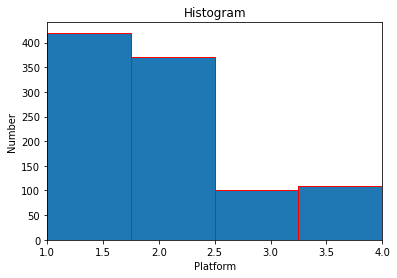

Gaussian Model score: 0.5674493834019708
Categorical Model score: 0.5452026924997805
Fitting 10 folds for each of 3 candidates, totalling 30 fits
{'min_categories': 2}
Hyper-parameter tuned Categorical model score: 0.5452026924997805
The label will be [0]
The probability of purchasing is 0.4621443813621863


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [2]:
#Importing necessary packages for the code.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

#Importing data into and converting it accordingly.
purchase=pd.read_excel("Purchase_Data.xls")
X=np.array(purchase.platform)
X=X.reshape(-1,1)
y=np.array(purchase.label)
y=np.ravel(y)
np.random.seed(33346623)
#Plotting the histogram for the data.
plt.hist(X,bins=4,edgecolor='red')
plt.xlabel('Platform')
plt.ylabel('Number')
plt.title('Histogram')
plt.xlim(1,4)
plt.locator_params(axis='x')
plt.show()

cv = RepeatedKFold(n_splits=5,n_repeats=2,random_state=33346623)

#Testing accuracy performances of all models with cross_val_score.
Gaussian=GaussianNB()
Categorical=CategoricalNB()

scoring='roc_auc'
GaussianScore = cross_val_score(Gaussian, X, y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
CategoricalScore = cross_val_score(Categorical, X, y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')

print("Gaussian Model score:", GaussianScore.mean())
print("Categorical Model score:", CategoricalScore.mean())

#Looking for the best hyperparameter to tune, to improve model performance.
model=CategoricalNB()
model.get_params()
params_NB = {'min_categories': [2,12,20]}
clf = RandomizedSearchCV(     estimator = model,
                              param_distributions=params_NB,
                              cv=cv, scoring=scoring,verbose=1,n_jobs=-1
                           )

clf.fit(X,y)
print(clf.best_params_)

#The hyper-parameter tuned model is now validated for accuracy on the unseen data.
model=CategoricalNB(min_categories=2)
model.fit(X,y)
m_scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print("Hyper-parameter tuned Categorical model score:", m_scores.mean())

independant= np.array([1])
independant=independant.reshape(1,-1)
val=clf.predict(independant)
yprob=(clf.predict_proba(independant))

print("The label will be",val)
print("The probability of purchasing is",format(yprob[0,1]))

In [111]:
from sklearn.svm import SVC
param_grid = {'C': [1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
clf = GridSearchCV(SVC(),param_grid,cv=cv,scoring=scoring,refit=True,verbose=2)
clf.fit(X,y)
print(clf.best_params_)

Fitting 20 folds for each of 36 candidates, totalling 720 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma

[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ...................

[CV] END ........................C=100, gamma=1, kernel=poly; total time=   6.4s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................

In [114]:
from sklearn import svm
model=svm.SVC(C=1,gamma=1,kernel='rbf')
model.fit(X,y)
m_scores = cross_val_score(model, X_valid, y_valid, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print("Hyper-parameter tuned Support Vector machine model score:", m_scores.mean())

Hyper-parameter tuned Support Vector machine model score: 0.609375


In [119]:
model=svm.SVC()
model.fit(X,y)
m_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print("Support Vector machine model score:", m_scores.mean())

Support Vector machine model score: 0.564


In [120]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X,y)
m_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print("Logistic Regression model score:", m_scores.mean())

Logistic Regression model score: 0.5379999999999999


In [121]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X,y)
m_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print("K Neighbours model score:", m_scores.mean())

K Neighbours model score: 0.5177499999999998


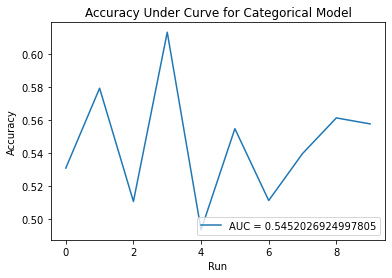

In [7]:
plt.plot(CategoricalScore,label="AUC = "+str(CategoricalScore.mean()))
plt.xlabel("Run")
plt.ylabel("Accuracy")
plt.legend(loc=4)
plt.title('Accuracy Under Curve for Categorical Model')
plt.show()

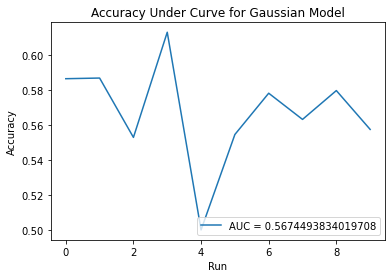

In [8]:
plt.plot(GaussianScore,label="AUC = "+str(GaussianScore.mean()))
plt.xlabel("Run")
plt.ylabel("Accuracy")
plt.legend(loc=4)
plt.title('Accuracy Under Curve for Gaussian Model')
plt.show()